In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 2: Load dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Step 3: Features & Target
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Step 4: Scale the features (KNN is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predict & evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7832167832167832
Confusion Matrix:
 [[71 16]
 [15 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82        87
           1       0.72      0.73      0.73        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



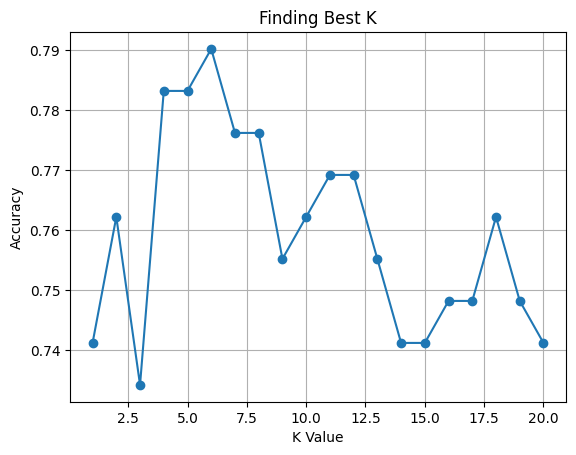

In [3]:
import matplotlib.pyplot as plt

accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Finding Best K')
plt.grid(True)
plt.show()
